In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca data dari file CSV
data = pd.read_excel(r"/content/drive/MyDrive/HomeCredit_DS/application_train.xlsx")
print('Dataset ini memiliki %d baris dan %d kolom.\n' % data.shape)
data.head()


Dataset ini memiliki 307511 baris dan 122 kolom.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Seleksi Kolom yang akan digunakan 
selected_columns = ["TARGET", "CODE_GENDER", "CNT_CHILDREN", "AMT_INCOME_TOTAL",
                    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
                    "NAME_HOUSING_TYPE"]

In [ ]:
data = data[selected_columns]


## Data type

In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   CODE_GENDER          307511 non-null  int64  
 2   CNT_CHILDREN         307511 non-null  int64  
 3   AMT_INCOME_TOTAL     307511 non-null  float64
 4   NAME_INCOME_TYPE     307511 non-null  int64  
 5   NAME_EDUCATION_TYPE  307511 non-null  int64  
 6   NAME_FAMILY_STATUS   307511 non-null  int64  
 7   NAME_HOUSING_TYPE    307511 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 18.8 MB


# EDA & Visualisasi

In [ ]:
print(set(data['TARGET']))

{0, 1}




*   0 = Ada kesulitan dalam membayar pinjaman
*   1 = tidak ada kesulitan dalam membayar pinjaman



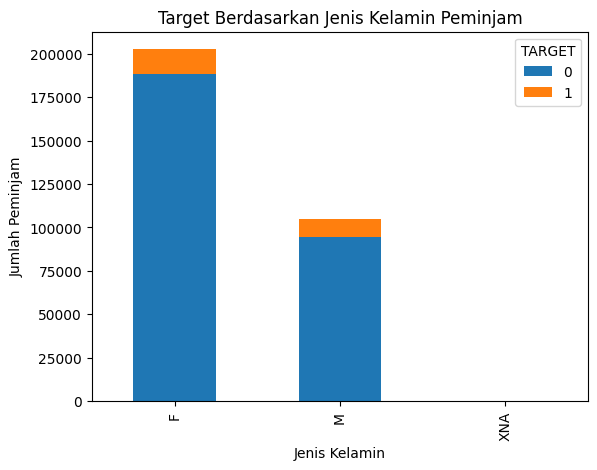

In [ ]:
# Visualisasi: Target berdasarkan jenis kelamin peminjam
gender_target = data.groupby('CODE_GENDER')['TARGET'].value_counts().unstack()
gender_target.plot(kind='bar', stacked = True)
plt.title('Target Berdasarkan Jenis Kelamin Peminjam')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Peminjam')
plt.show()


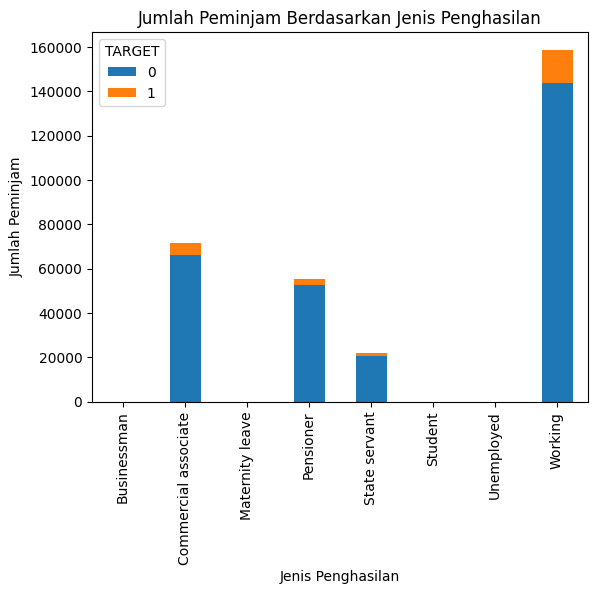

In [ ]:
# Visualisasi: Target berdasarkan jenis penghasilan peminjam
income_target = data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().unstack()
income_target.plot(kind='bar', stacked= True)
plt.title('Jumlah Peminjam Berdasarkan Jenis Penghasilan')
plt.xlabel('Jenis Penghasilan')
plt.ylabel('Jumlah Peminjam')
plt.show()

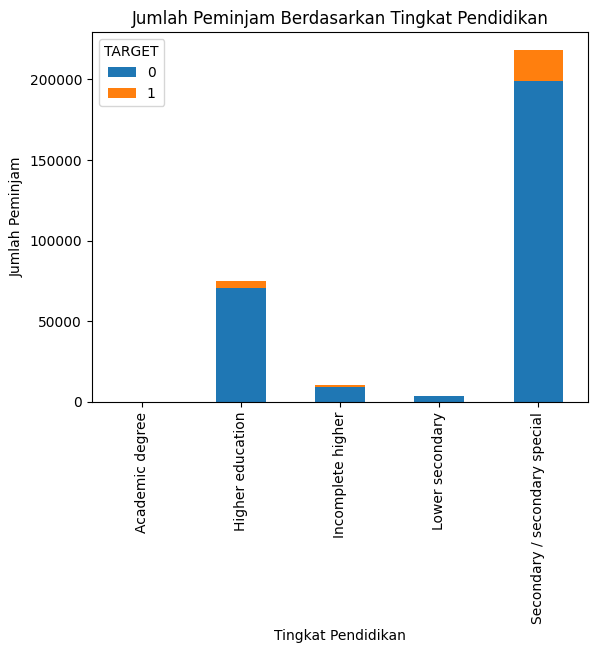

In [ ]:
# Visualisasi: Target berdasarkan pendidikan peminjam
education_target = data.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts().unstack()
education_target.plot(kind='bar', stacked = True)
plt.title('Jumlah Peminjam Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Peminjam')
plt.show()

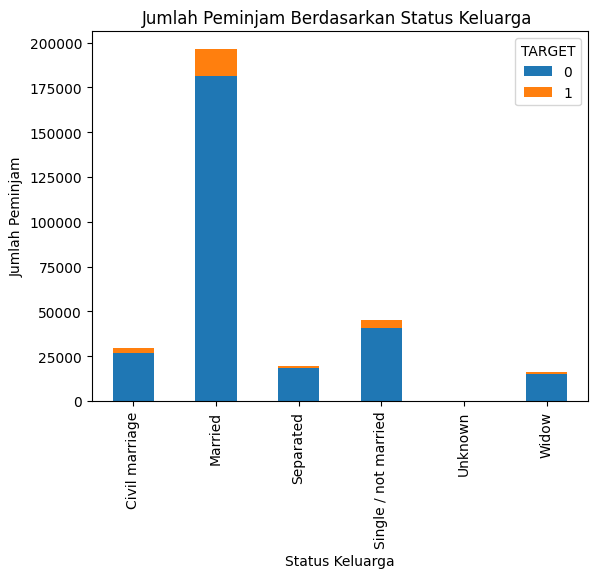

In [ ]:
# Visualisasi: Target berdasarkan status keluarga peminjam
family_status_target = data.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().unstack()
family_status_target.plot(kind='bar', stacked = True)
plt.title('Jumlah Peminjam Berdasarkan Status Keluarga ')
plt.xlabel('Status Keluarga')
plt.ylabel('Jumlah Peminjam')
plt.show()


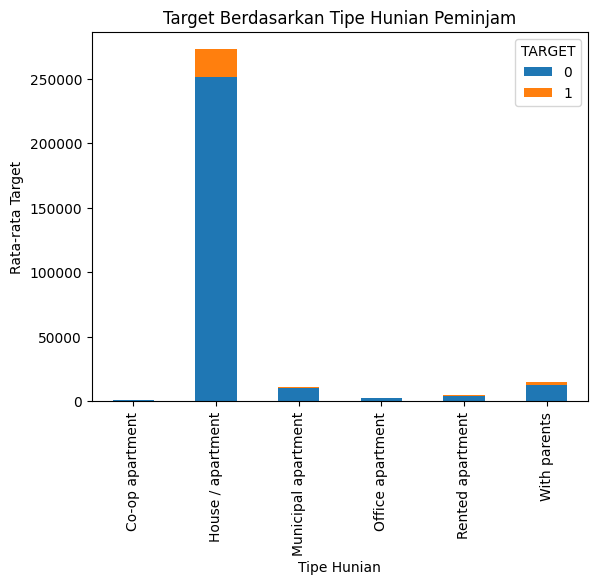

In [ ]:
# Visualisasi: Target berdasarkan tempat tinggal peminjam
housing_type_target = data.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().unstack()
housing_type_target.plot(kind='bar', stacked=True)
plt.title('Target Berdasarkan Tipe Hunian Peminjam')
plt.xlabel('Tipe Hunian')
plt.ylabel('Rata-rata Target')
plt.show()

### Melakukan encoding pada variabel kategorikal


In [ ]:

label_encoder = LabelEncoder()
categorical_columns = ["CODE_GENDER", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                       "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


### Memisahkan variable x dan y

In [ ]:
X = data.drop("TARGET", axis=1)
y = data["TARGET"]

### Membagi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Membangun model Random Forest Classifier


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


### Melatih Model Menggunakan Data Latih

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Memprediksi Data Uji

In [ ]:
y_pred = model.predict(X_test)


### Mengukur Akurasi Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 91.50%


## Evaluasi

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56221,   333],
       [ 4897,    52]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56554
           1       0.14      0.01      0.02      4949

    accuracy                           0.91     61503
   macro avg       0.53      0.50      0.49     61503
weighted avg       0.86      0.91      0.88     61503

